# "지하철 이용승객 분석" EDA 프로젝트(1)
- 이번 프로젝트에서는 EDA가 무엇이고 , 실습을 통해 EDA 하는 방법을 배워보겠습니다.
- EDA(Exploratory Data Analysis 탐색적 데이터 분석)는 데이터를 이해하는 과정이며 
- 통계적 요약, 분포 파악 및 시각화 등의 기법을 통해 직관적으로 데이터 특성 파악 할수 있습니다.
- 결국, EDA를 통해 데이터에서 트랜드 분석, 인사이트 도출하게 됩니다. 


## EDA 실습을 통해 해결해야 할 질문들
 
- 2019.01~06 중에 언제 지하철을 가장 많이 이용했을까? (기준: 승하자총승객수)
- 1월~6월중에 5월에 지하철 승객수가 많다? (기준 :승하자총승객수)
- 요일중에서 목요일에 지하철 승객수가 많다? (기준 :승하자총승객수)
- 일자별(월일별) 승하차승객수 그래프 그려 볼까요? (기준 :승하자총승객수)
- 가장 승객이 많이 타는 승차역은?
- 노선별로 역별/요일별 승차승객수를 비교해 볼수 있을까? (1~9호선, 역별/요일별 heatmap)
- 1호선에서 가장 하자를 많이 하는 역은? (groupby)
- 2호선중에서 어느 역에서 승차가 가장 많이 발생할까? (Folium 역 표시)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pathlib import Path
import numpy as np
from matplotlib import font_manager, rc
font_path = "c:\WINDOWS\Fonts\GULIM.TTC"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rc('font', size=8)


# 파일 관리 

In [31]:
def concat_dfs(folder_path:str , number:int = 1) -> pd.DataFrame:
    '''
    CSV 파일들이 담겨있는 절대 경로를 str 형태로 입력
    Path로 변형한 뒤 폴더 내에 있는 모든 CSV 파일들을 리스트로 표현
    number째 까지 데이터프레임을 concat 하기
    '''
    if Path.is_dir(Path(folder_path)): # 폴더명이 존재
        final = pd.DataFrame()
        folder_path = list(Path(folder_path).glob('*.csv'))
        for df_path in folder_path[:number]:
            temp = pd.read_csv(df_path)
            final = pd.concat([final,temp],ignore_index=True)
        return final
    else: # 폴더명이 존재하지 않음
        print('폴더명이 잘못되었습니다. 다시 입력해주세요.')

In [32]:
dataframe = concat_dfs(r'C:\Users\hyssk\OneDrive\바탕 화면\EDA_AI+X\실습\rawfiles',6)

# 2019.01~06 중에 언제 지하철을 가장 많이 이용했을까? (기준: 승하자총승객수)

## 사용일자, 등록일자 칼럼을 to_datetime으로 변경

In [33]:
dataframe['사용일자'] = pd.to_datetime(dataframe['사용일자'], format='%Y%m%d')
dataframe['등록일자'] = pd.to_datetime(dataframe['등록일자'], format='%Y%m%d')
dataframe

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,2019-01-04
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,2019-01-04
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,2019-01-04
3,2019-01-01,2호선,시청,8381.0,6049.0,2019-01-04
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,2019-01-04
...,...,...,...,...,...,...
107023,2019-06-30,7호선,마들,6622.0,6116.0,2019-07-03
107024,2019-06-30,4호선,노원,14071.0,14702.0,2019-07-03
107025,2019-06-30,7호선,중계,9516.0,8981.0,2019-07-03
107026,2019-06-30,7호선,하계,11645.0,11121.0,2019-07-03


In [34]:
dataframe['월일'] = dataframe['사용일자'].dt.strftime('%m-%d')
dataframe['연월'] = dataframe['사용일자'].dt.strftime('%Y-%m')
dataframe['요일'] = dataframe['사용일자'].dt.dayofweek

In [35]:
dataframe['요일'] = dataframe['요일'].map({0: '월',
                        1:'화',
                        2:'수',
                        3:'목',
                        4:'금',
                        5:'토',
                        6:'일'})

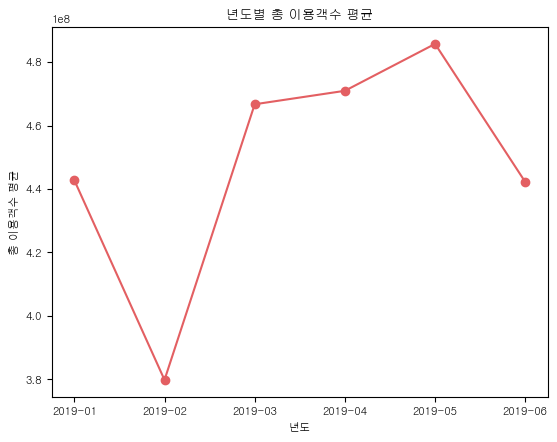

In [36]:
dataframe['총 이용객수'] = dataframe['승차총승객수'] + dataframe['하차총승객수']
q_1=dataframe.groupby('연월').sum()['총 이용객수']
plt.figure()
plt.scatter(q_1.index,q_1.values,color='#e35f62')
plt.plot(q_1.index,q_1.values,color='#e35f62')
plt.xlabel('년도')
plt.ylabel('총 이용객수 평균')
plt.title('년도별 총 이용객수 평균')
plt.show()

2019.01~06 중에 언제 지하철을 가장 많이 이용했을까? (기준: 승하자총승객수)

- 5월에 가장 많이 이용했음을 알 수 있다.


# 요일 중에서 목요일에 지하철 승객수가 많다


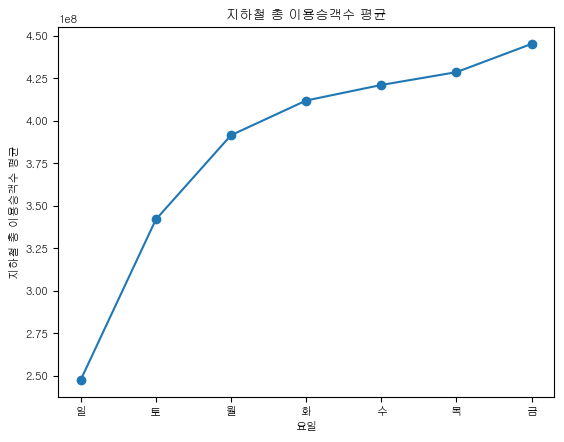

In [37]:
df_2=dataframe.groupby('요일').sum()[['총 이용객수']].sort_values(by='총 이용객수')
plt.figure()
plt.scatter(df_2.index,df_2.values)
plt.xlabel("요일")
plt.ylabel("지하철 총 이용승객수 평균")
plt.title("지하철 총 이용승객수 평균")
plt.plot(df_2.index,df_2.values)
plt.show()

금요일에 가장 많음을 알 수 있다.

# 연월 각각에 대해 일자별(월일별) 승하차총승객수 그래프 (PointPlot)

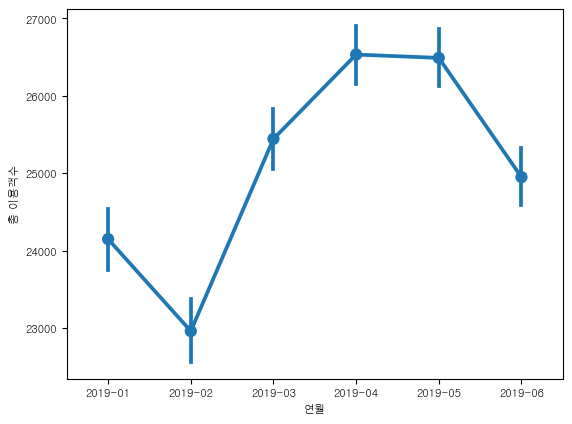

In [38]:
plt.figure()
sns.pointplot(dataframe,x='연월',y='총 이용객수')
plt.show()

# 가장 승객이 많이 타는 승차역은?

In [39]:
df_3 = dataframe.groupby('역명').sum()[['승차총승객수']]
df_3.sort_values(by='승차총승객수',ascending=False)

,승차총승객수
역명,
잠실,18574323.0
강남,18148024.0
고속터미널,17541287.0
홍대입구,17270084.0
서울역,17165598.0
...,...
신원,43013.0
백양리,34193.0
굴봉산,34051.0


잠실

# 노선별로 역별/요일별 승차 승객수를 비교해볼 수 있을까? (1~9호선, 역별/요일별 heatmap)

## 호선 , 요일별

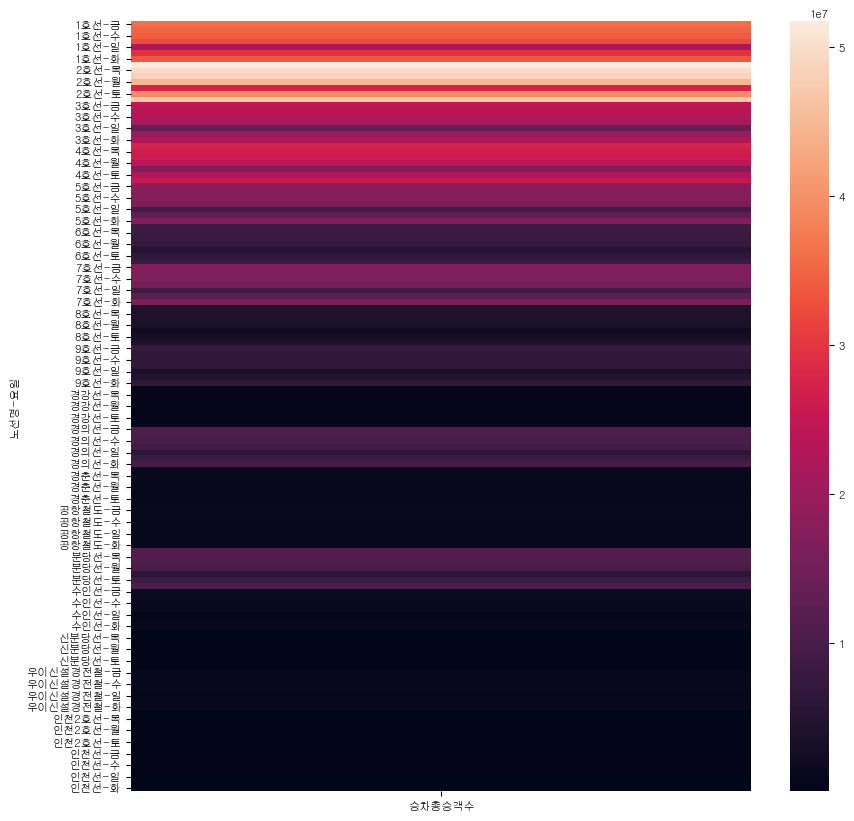

In [40]:
df_3 = dataframe.groupby(['노선명','요일']).sum()[['승차총승객수']]
plt.figure(figsize=(10,10))
sns.heatmap(df_3)
plt.show()

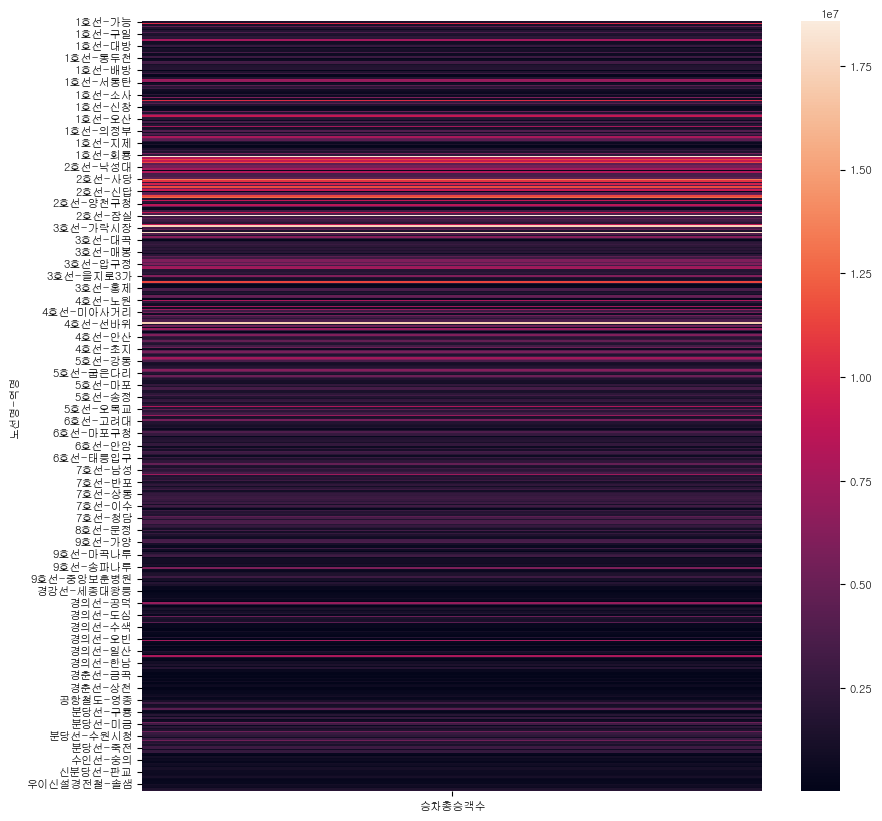

In [41]:
df_4 = dataframe.groupby(['노선명','역명']).sum()[['승차총승객수']]
plt.figure(figsize=(10,10))
sns.heatmap(df_4)
plt.show()

# 1호선에서 가장 하차를 많이하는 역은? (groupby)


In [42]:
dataframe[dataframe['노선명']=='1호선']

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,월일,연월,요일,총 이용객수
6,2019-01-01,1호선,제기동,10187.0,10178.0,2019-01-04,01-01,2019-01,화,20365.0
7,2019-01-01,1호선,신설동,6832.0,6930.0,2019-01-04,01-01,2019-01,화,13762.0
9,2019-01-01,1호선,종로5가,13578.0,13282.0,2019-01-04,01-01,2019-01,화,26860.0
10,2019-01-01,1호선,종각,20944.0,16658.0,2019-01-04,01-01,2019-01,화,37602.0
52,2019-01-01,1호선,신설동,2525.0,2197.0,2019-01-04,01-01,2019-01,화,4722.0
...,...,...,...,...,...,...,...,...,...,...
106862,2019-06-30,1호선,신창,1146.0,1357.0,2019-07-03,06-30,2019-06,일,2503.0
106919,2019-06-30,1호선,인천,1231.0,1972.0,2019-07-03,06-30,2019-06,일,3203.0
106946,2019-06-30,1호선,신길,1713.0,1890.0,2019-07-03,06-30,2019-06,일,3603.0
107016,2019-06-30,1호선,석계,8307.0,8061.0,2019-07-03,06-30,2019-06,일,16368.0


In [43]:
df_5=dataframe[dataframe['노선명']=='1호선'] # 노선명이 1호선인 dataframe 추출
df_5= df_5.groupby('역명').sum()[['하차총승객수']]
df_5[df_5['하차총승객수'] == df_5['하차총승객수'].max()] # 하차를 가장 많이 하는 역?

,하차총승객수
역명,
가산디지털단지,10571381.0


In [44]:
dataframe

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,월일,연월,요일,총 이용객수
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,2019-01-04,01-01,2019-01,화,7590.0
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,2019-01-04,01-01,2019-01,화,15658.0
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,2019-01-04,01-01,2019-01,화,43808.0
3,2019-01-01,2호선,시청,8381.0,6049.0,2019-01-04,01-01,2019-01,화,14430.0
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,2019-01-04,01-01,2019-01,화,16549.0
...,...,...,...,...,...,...,...,...,...,...
107023,2019-06-30,7호선,마들,6622.0,6116.0,2019-07-03,06-30,2019-06,일,12738.0
107024,2019-06-30,4호선,노원,14071.0,14702.0,2019-07-03,06-30,2019-06,일,28773.0
107025,2019-06-30,7호선,중계,9516.0,8981.0,2019-07-03,06-30,2019-06,일,18497.0
107026,2019-06-30,7호선,하계,11645.0,11121.0,2019-07-03,06-30,2019-06,일,22766.0


In [45]:
import folium
geo_dataframe = pd.read_csv(r'C:\Users\hyssk\OneDrive\바탕 화면\EDA_AI+X\실습\rawfiles\지하철노선위경도정보2.csv')
geo_dataframe=geo_dataframe.rename(columns={'호선':'노선명','역이름':'역명'})

merged_dataframe = pd.merge(dataframe,geo_dataframe,how='inner') # 위도 경도가 포함된 데이터프레임
merged_dataframe.drop(columns='등록일자',inplace=True)

In [46]:
geo_dataframe

,역명,역지역,위도,경도,노선명
0,낙성대,수도권,37.477090,126.963506,2호선
1,구룡,수도권,37.487027,127.059475,분당선
2,서울대입구,수도권,37.481285,126.952695,2호선
3,불광,수도권,37.610044,126.930302,3호선
4,월롱,수도권,37.796204,126.792563,경의선
...,...,...,...,...,...
970,현충원,대전,36.359070,127.321793,1호선
971,월드컵경기장,대전,36.366849,127.317836,1호선
972,노은,대전,36.374130,127.317866,1호선
973,지족,대전,36.384093,127.319489,1호선


In [47]:
number1_coordinates = geo_dataframe[geo_dataframe['노선명']=='1호선']
number2_coordinates = geo_dataframe[geo_dataframe['노선명']=='2호선']
number3_coordinates = geo_dataframe[geo_dataframe['노선명']=='3호선']
number4_coordinates = geo_dataframe[geo_dataframe['노선명']=='4호선']
number5_coordinates = geo_dataframe[geo_dataframe['노선명']=='5호선']
number6_coordinates = geo_dataframe[geo_dataframe['노선명']=='6호선']
number7_coordinates = geo_dataframe[geo_dataframe['노선명']=='7호선']
number8_coordinates = geo_dataframe[geo_dataframe['노선명']=='8호선']
number9_coordinates = geo_dataframe[geo_dataframe['노선명']=='9호선']
kyungeui_coordinates = geo_dataframe[geo_dataframe['노선명']=='경의선']
bundang_coordinates = geo_dataframe[geo_dataframe['노선명']=='분당선']
incheon_coordinates = geo_dataframe[geo_dataframe['노선명']=='인천선']
incheon2_coordinates = geo_dataframe[geo_dataframe['노선명']=='인천2호선']
kyungchun_coordinates = geo_dataframe[geo_dataframe['노선명']=='경춘선']
yongin_coordinates = geo_dataframe[geo_dataframe['노선명']=='용인경전철']
euijungboo_coordinates = geo_dataframe[geo_dataframe['노선명']=='의정부경전철']
airport_coordinates = geo_dataframe[geo_dataframe['노선명']=='공항철도']
suwon_incheon_coordinates = geo_dataframe[geo_dataframe['노선명']=='수인선']
new_bundang_coordinates = geo_dataframe[geo_dataframe['노선명']=='신분당선']
ui_coordinates = geo_dataframe[geo_dataframe['노선명']=='우이신설경전철']
westsea_coordinates = geo_dataframe[geo_dataframe['노선명']=='서해선']
kyungkang_coordinates = geo_dataframe[geo_dataframe['노선명']=='경강선']
kimpogold_coordinates = geo_dataframe[geo_dataframe['노선명']=='김포골드']

all_coord=[number1_coordinates,number2_coordinates,number3_coordinates,number4_coordinates,number5_coordinates,number6_coordinates,
           number7_coordinates,number8_coordinates,number9_coordinates,kyungeui_coordinates,bundang_coordinates,incheon_coordinates,
           incheon2_coordinates,kyungchun_coordinates,yongin_coordinates,euijungboo_coordinates, airport_coordinates,suwon_incheon_coordinates,
           new_bundang_coordinates,ui_coordinates,westsea_coordinates,kyungkang_coordinates,kimpogold_coordinates]
len(all_coord)

23

In [48]:
m = folium.Map(location=[37.5, 127], zoom_start=10.5)

color_list=['blue','green','orange','lightblue','purple','lightred','beige','pink','darkgreen','darkred','lightgray','lightblue',
    'purple','darkpurple','pink','cadetblue','lightgray','black','red','blue','gray','darkred','orange']

train_list=['1호선','2호선','3호선','4호선','5호선','6호선','7호선','8호선','9호선',
            '경의선','분당선','인천선','인천2호선','경춘선','용인경전철','의정부경전철',
            '공항철도선','수인선','신분당선','우이신설경전철','서해선','경강선','김포골드']

for i,coord in enumerate(all_coord):
    for latitude,longitude in coord[['위도','경도']].values:
        folium.Marker([latitude, longitude],tooltip=train_list[i],icon=folium.Icon(color_list[i], icon='star')).add_to(m)
m
# 수정이 필요함

# 2호선 중에서 어느 역에서 승차가 가장 많이 발생할까? 


In [49]:
df_6=dataframe.groupby(['노선명','역명']).sum()
df_7 = df_6.loc[[('2호선')]]
df_7[df_7['승차총승객수']==df_7['승차총승객수'].max()] # 승차를 가장 많이 하는 곳

,,승차총승객수,하차총승객수,총 이용객수
노선명,역명,,,
2호선,잠실,18574323.0,18390074.0,36964397.0


잠실

In [50]:
m = folium.Map(location=[36, 128], zoom_start=7)
gangnam_la_long = geo_dataframe[geo_dataframe['역명']=='강남'][['위도','경도']].values[0] # 강남의 위도 경도 좌표 추출

folium.Marker(location=gangnam_la_long,tooltip='잠실',popup='승차총 이용객수:\n18574323.0 명').add_to(m)
m